# Analiza Danych w Pythonie: Pandas

### Tomasz Dwojak

### 16 grudnia 2017

## Dlaczego Python?

In [12]:
# Render our plots inline
%matplotlib inline

from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

plt.rcParams['figure.figsize'] = (15, 5)

In [3]:
import pandas as pd

In [4]:
losowe = np.random.randint(1, 20, 26)
print(losowe)

[ 7  7  8  2 18 12 17  1 12  4  8  6 18  3  5 10  3 17  2  9  8  8 12  1  9
 16]


## Series czyli szereg

In [5]:
dane = pd.Series(losowe)
print(dane)

0      7
1      7
2      8
3      2
4     18
5     12
6     17
7      1
8     12
9      4
10     8
11     6
12    18
13     3
14     5
15    10
16     3
17    17
18     2
19     9
20     8
21     8
22    12
23     1
24     9
25    16
dtype: int64


In [6]:
dane2 = pd.Series([1,2,3,4,5], index=['a', 'b', 'c', 'd', 'e'])
print(dane2)

a    1
b    2
c    3
d    4
e    5
dtype: int64


In [7]:
print(len(dane))
print(dane.shape)

26
(26,)


In [9]:
print(dane.head())

print(dane.tail())

0     7
1     7
2     8
3     2
4    18
dtype: int64
21     8
22    12
23     1
24     9
25    16
dtype: int64


In [13]:
print("Średnia:", dane.mean())
print("Mediana:", dane.median())

Średnia: 8.57692307692
Mediana: 8.0


In [15]:
print("Zbiór wartości:", dane.unique())
print("Zliczanie", dane.value_counts())
print(dane.value_counts().head())

Zbiór wartości: [ 7  8  2 18 12 17  1  4  6  3  5 10  9 16]
Zliczanie 8     4
12    3
18    2
17    2
9     2
7     2
3     2
2     2
1     2
16    1
10    1
6     1
5     1
4     1
dtype: int64
8     4
12    3
18    2
17    2
9     2
dtype: int64


In [16]:
print(dane.describe())

count    26.000000
mean      8.576923
std       5.375300
min       1.000000
25%       4.250000
50%       8.000000
75%      12.000000
max      18.000000
dtype: float64


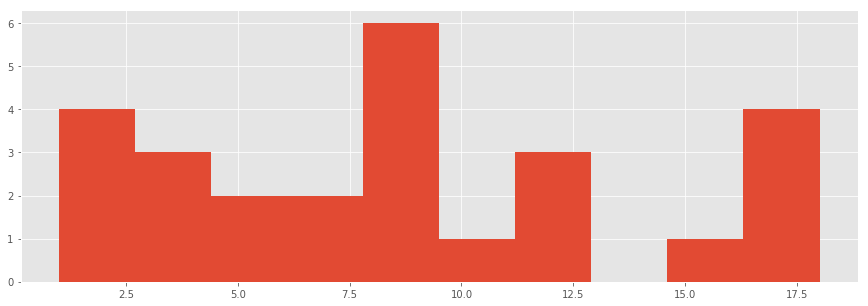

In [17]:
dane.hist()

### Indeksowanie

In [18]:
import string
litery = list(string.ascii_uppercase)
dane3 = pd.Series(losowe, index=litery)
print(dane3.head())

A     7
B     7
C     8
D     2
E    18
dtype: int64


In [20]:
print(dane3['E'])
print(dane3[['P', 'Y', 'T']])
print(dane3['B':'E'])

18
P    10
Y     9
T     9
dtype: int64
B     7
C     8
D     2
E    18
dtype: int64


### Mapowanie

In [22]:
def cube(x):
    return x ** 3
print(dane3.map(cube))

A     343
B     343
C     512
D       8
E    5832
F    1728
G    4913
H       1
I    1728
J      64
K     512
L     216
M    5832
N      27
O     125
P    1000
Q      27
R    4913
S       8
T     729
U     512
V     512
W    1728
X       1
Y     729
Z    4096
dtype: int64


### DataFrame (ramka danych)

In [23]:
wielkie = list(string.ascii_uppercase)
male = list(string.ascii_lowercase)
surowe = list(zip(male, wielkie))
print(surowe)

dane = pd.DataFrame(surowe)
print(dane)

[('a', 'A'), ('b', 'B'), ('c', 'C'), ('d', 'D'), ('e', 'E'), ('f', 'F'), ('g', 'G'), ('h', 'H'), ('i', 'I'), ('j', 'J'), ('k', 'K'), ('l', 'L'), ('m', 'M'), ('n', 'N'), ('o', 'O'), ('p', 'P'), ('q', 'Q'), ('r', 'R'), ('s', 'S'), ('t', 'T'), ('u', 'U'), ('v', 'V'), ('w', 'W'), ('x', 'X'), ('y', 'Y'), ('z', 'Z')]
    0  1
0   a  A
1   b  B
2   c  C
3   d  D
4   e  E
5   f  F
6   g  G
7   h  H
8   i  I
9   j  J
10  k  K
11  l  L
12  m  M
13  n  N
14  o  O
15  p  P
16  q  Q
17  r  R
18  s  S
19  t  T
20  u  U
21  v  V
22  w  W
23  x  X
24  y  Y
25  z  Z


In [24]:
dane.columns = ["małe", "wielkie"]
print(dane.head())

  małe wielkie
0    a       A
1    b       B
2    c       C
3    d       D
4    e       E


In [25]:
dane['losowe'] = np.random.randint(1, 20, 26)

## Wczytywanie danych

In [26]:
bike_data = pd.read_csv('bikes.csv', # ścieżka  do pliku
                        sep=';', # separator
                        encoding='latin1', # kodowanie
                        parse_dates=['Date'], # kolumny, w których występują daty
                        dayfirst=True, # format dzień - miesiąc - rok
                        index_col='Date') # ustawienie indeksu na kolumnę Date

In [36]:
print(bike_data.columns)
print(bike_data.head())

Index([u'Berri 1', u'Brébeuf (données non disponibles)',
       u'Côte-Sainte-Catherine', u'Maisonneuve 1', u'Maisonneuve 2',
       u'du Parc', u'Pierre-Dupuy', u'Rachel1',
       u'St-Urbain (données non disponibles)'],
      dtype='object')
            Berri 1  Brébeuf (données non disponibles)  Côte-Sainte-Catherine  \
Date                                                                            
2012-01-01       35                                NaN                      0   
2012-01-02       83                                NaN                      1   
2012-01-03      135                                NaN                      2   
2012-01-04      144                                NaN                      1   
2012-01-05      197                                NaN                      2   

            Maisonneuve 1  Maisonneuve 2  du Parc  Pierre-Dupuy  Rachel1  \
Date                                                                       
2012-01-01             38           

## Odwoływanie się do kolumn

In [29]:
bike_data['Berri 1']

Date
2012-01-01      35
2012-01-02      83
2012-01-03     135
2012-01-04     144
2012-01-05     197
2012-01-06     146
2012-01-07      98
2012-01-08      95
2012-01-09     244
2012-01-10     397
2012-01-11     273
2012-01-12     157
2012-01-13      75
2012-01-14      32
2012-01-15      54
2012-01-16     168
2012-01-17     155
2012-01-18     139
2012-01-19     191
2012-01-20     161
2012-01-21      53
2012-01-22      71
2012-01-23     210
2012-01-24     299
2012-01-25     334
2012-01-26     306
2012-01-27      91
2012-01-28      80
2012-01-29      87
2012-01-30     219
              ... 
2012-10-07    1580
2012-10-08    1854
2012-10-09    4787
2012-10-10    3115
2012-10-11    3746
2012-10-12    3169
2012-10-13    1783
2012-10-14     587
2012-10-15    3292
2012-10-16    3739
2012-10-17    4098
2012-10-18    4671
2012-10-19    1313
2012-10-20    2011
2012-10-21    1277
2012-10-22    3650
2012-10-23    4177
2012-10-24    3744
2012-10-25    3735
2012-10-26    4290
2012-10-27    1857
2012-10

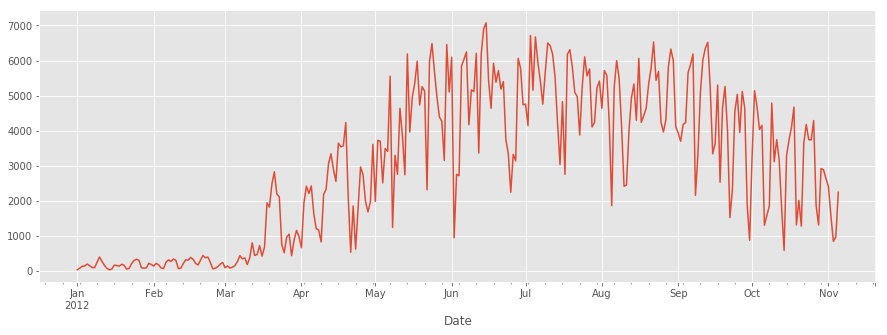

In [31]:
bike_data["Berri 1"].plot()

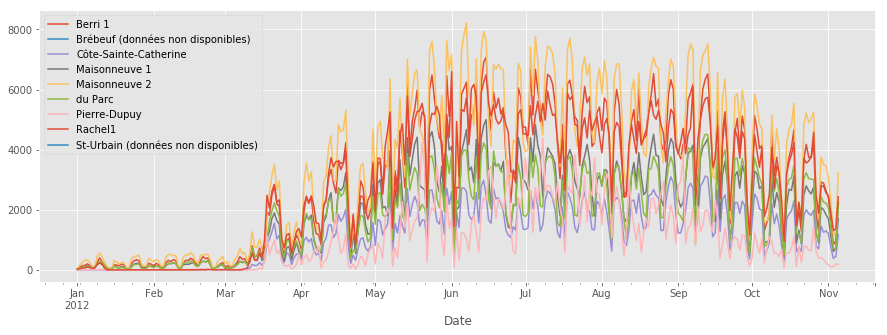

In [32]:
bike_data.plot()